<a href="https://colab.research.google.com/github/brunoribeiro-git/Portfolio-uninter/blob/main/Atividade_pr%C3%A1tica_5267413_LP_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Bruno Danilo Ribeiro
RU: 5267413
Curso: Tecnologia em Ciência de Dados

**Exercício 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('salarios.csv', encoding='latin1')
print(df.head())

        Cargo   Salario
0    Analista   4723.45
1     Gerente  13200.78
2  Estagiário   1450.00
3       Líder   8500.30
4    Analista   3890.10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cargo    10 non-null     object 
 1   Salario  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [ ]:
media_salarios = df.groupby('Cargo')['Salario'].mean().round(2).sort_values(ascending=False).reset_index()
print(media_salarios)

        Cargo   Salario
0     Gerente  13067.01
1       Líder   8800.52
2    Analista   4237.85
3  Estagiário   1525.25


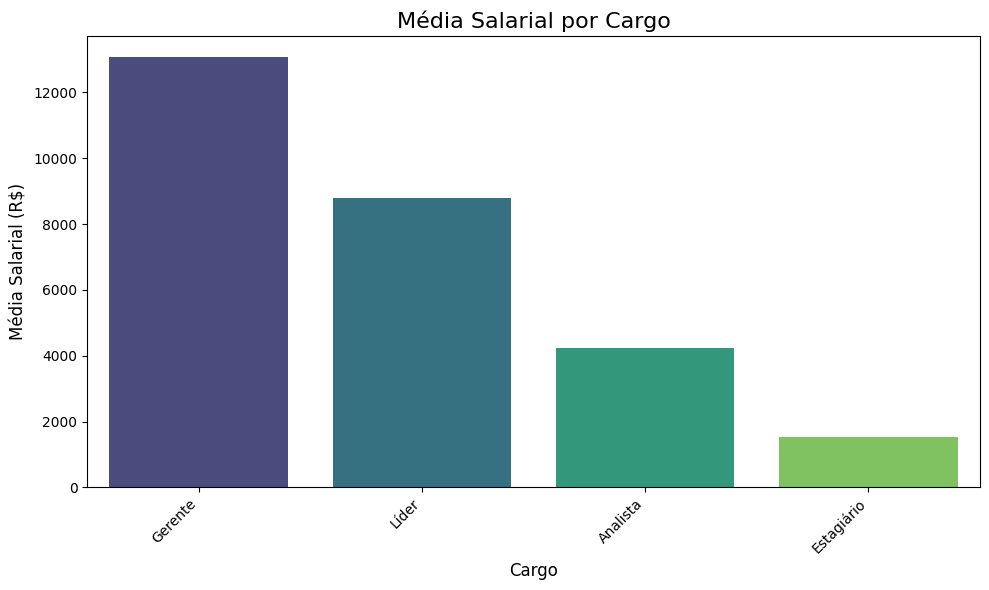

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cargo', y='Salario', data=media_salarios, hue='Cargo', palette='viridis', legend=False)
plt.title('Média Salarial por Cargo', fontsize=16)
plt.xlabel('Cargo', fontsize=12)
plt.ylabel('Média Salarial (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('media_salarios_por_cargo.png')
plt.show()

**Exercício 2**

In [ ]:
import re
import json

In [ ]:
texto = "Nome: Ana, Email: ana@email.com, Nome: João, Email: joao@email.com"

nomes = re.findall(r'Nome: (\w+)', texto)
emails = re.findall(r'Email: (\w+@\w+\.\w+)', texto)


In [ ]:
print(nomes)
print(emails)

['Ana', 'João']
['ana@email.com', 'joao@email.com']


In [ ]:
usuarios= []
for nome, email in zip(nomes, emails):
    usuarios.append({"nome": nome, "email": email})

nome_arquivo = "usuarios.json"
with open(nome_arquivo, "w") as arquivo:
    json.dump(usuarios, arquivo, indent=4)

print("\nConteúdo do arquivo JSON:")
print(json.dumps(usuarios, indent=4, ensure_ascii=False))


Conteúdo do arquivo JSON:
[
    {
        "nome": "Ana",
        "email": "ana@email.com"
    },
    {
        "nome": "João",
        "email": "joao@email.com"
    }
]


**Exercício 3**

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
 df_clientes = pd.read_excel('loja.xlsx', sheet_name='CLIENTE')
 df_clientes.head()

,Idcliente,Nome,Sobrenome,Sexo,Email
0,1,Deivison,Silva,m,deivisonsilva@hotmail.com
1,2,Shiryu,da Chuva,m,shiryu@cavaleirosdoszoodiacos.com
2,3,Carolina,Liz,f,carol_liz@hotmail.com
3,4,Drogo,Trones,m,drogogameoftrones@gmail.com
4,5,Malévola,Disney,f,malevola@disney.com


In [ ]:
conn = sqlite3.connect('usuarios.db')
df_clientes.to_sql('clientes', conn, if_exists='replace', index=False)

df_todos = pd.read_sql_query("SELECT * FROM clientes", conn)
print(df_todos)

   Idcliente       Nome Sobrenome Sexo                              Email
0          1   Deivison     Silva    m          deivisonsilva@hotmail.com
1          2     Shiryu  da Chuva    m  shiryu@cavaleirosdoszoodiacos.com
2          3   Carolina       Liz    f              carol_liz@hotmail.com
3          4      Drogo    Trones    m        drogogameoftrones@gmail.com
4          5   Malévola    Disney    f                malevola@disney.com
5          6  Guilherme  Patriota    m                guilherme@gmail.com
6          7     Marina    Santos    f                  marina@pop.com.br
7          8   Deivison   Andrade    m                 teste@teste.com.br


In [ ]:
query_feminino = "SELECT * FROM clientes WHERE sexo = 'f'"
df_feminino = pd.read_sql_query(query_feminino, conn)
print(df_feminino)

   Idcliente      Nome Sobrenome Sexo                  Email
0          3  Carolina       Liz    f  carol_liz@hotmail.com
1          5  Malévola    Disney    f    malevola@disney.com
2          7    Marina    Santos    f      marina@pop.com.br


In [ ]:
conn.close()
df_feminino.to_excel('clientes_feminino.xlsx', index=False)